<a href="https://colab.research.google.com/github/aru007-sorce/TheCalculator/blob/main/Loan_prediction_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Training Dataset.csv")

In [3]:
num_vars=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
cat_vars=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Status']

In [4]:
df.drop('Loan_ID', axis=1, inplace=True)

In [5]:
print(df.shape)

(614, 12)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.value_counts()

Gender  Married  Dependents  Education     Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
Female  No       0           Graduate      No             645              3683.0             113.0       480.0             1.0             Rural          Y              1
                                                          1500             1800.0             103.0       360.0             0.0             Semiurban      N              1
Male    Yes      1           Graduate      No             4283             3000.0             172.0       84.0              1.0             Rural          N              1
                                                          3988             0.0                50.0        240.0             1.0             Urban          Y              1
                                                          3875             0.0                67.0        360.0             1.0             Urban

cleaning the data


In [9]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

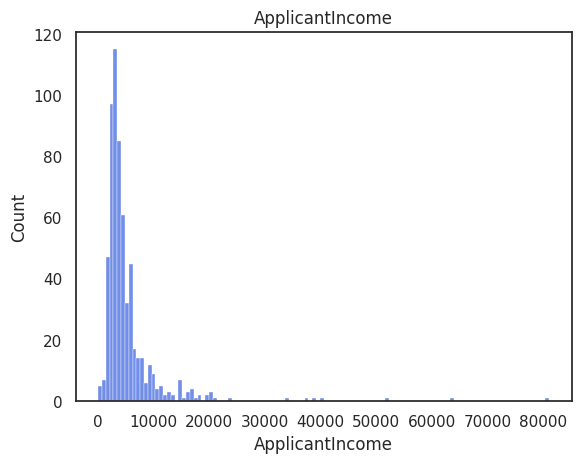

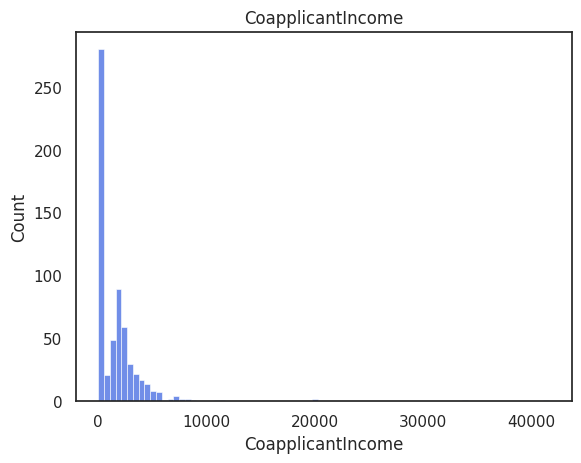

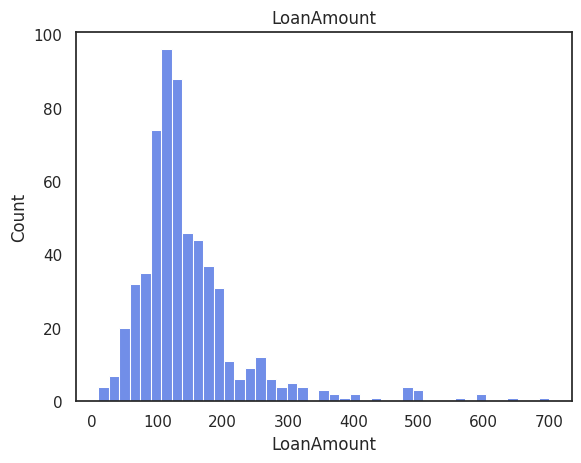

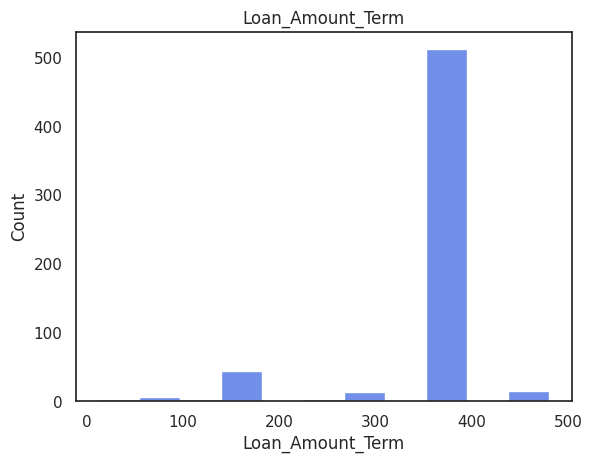

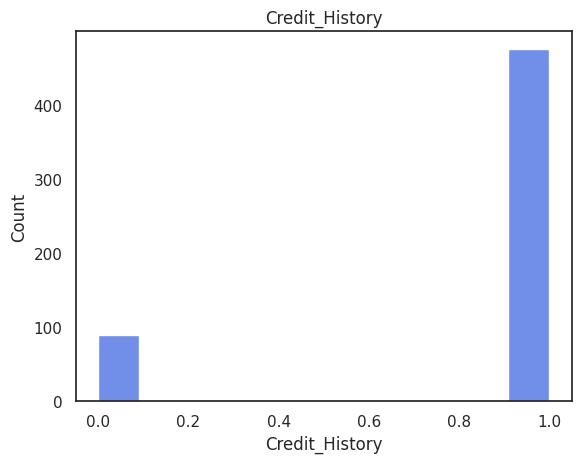

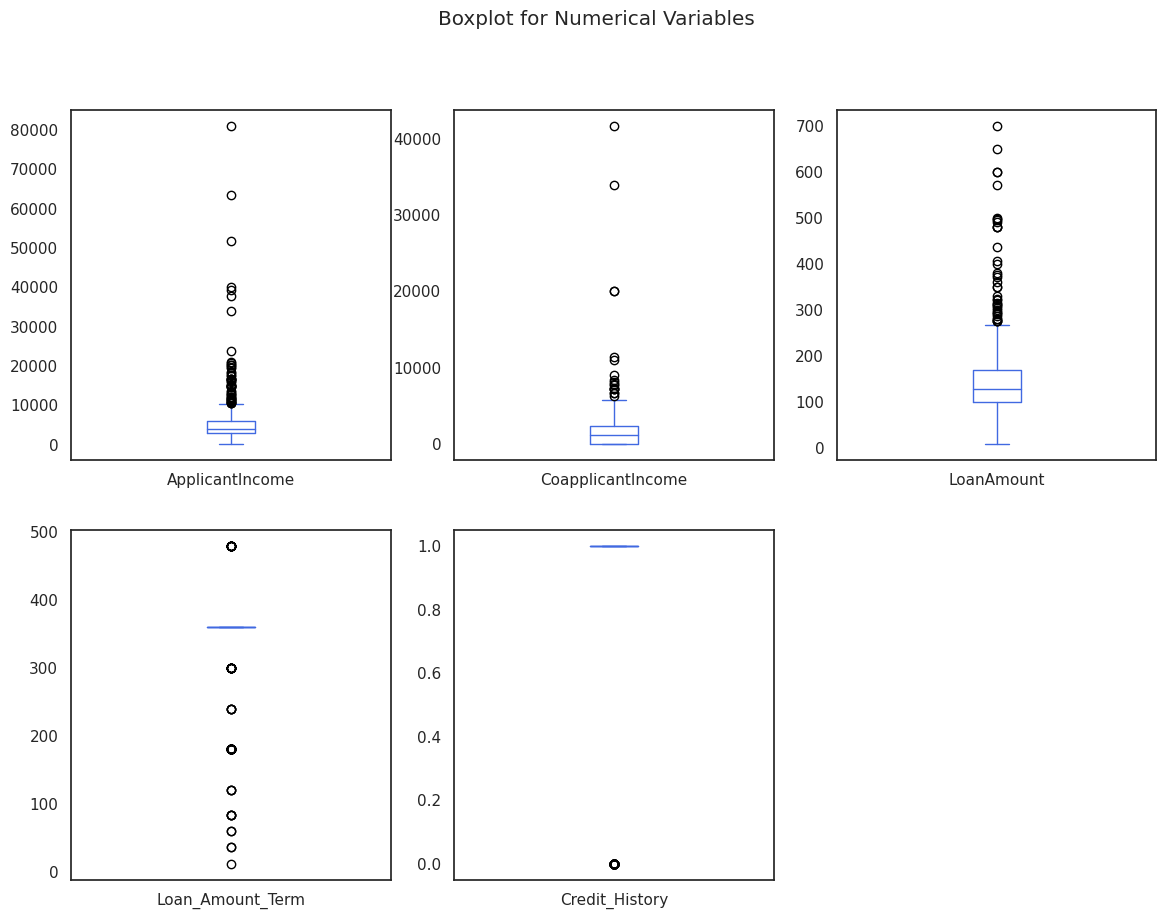

In [10]:
for var in num_vars:
    sns.set(style='white',)
    sns.histplot(df[var], color="royalblue")
    plt.title(var)
    plt.show()

df[num_vars].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,10), title='Boxplot for Numerical Variables', color='royalblue')
plt.show()

So 69 percent of people have Approved loan out of 100

In [11]:
df['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

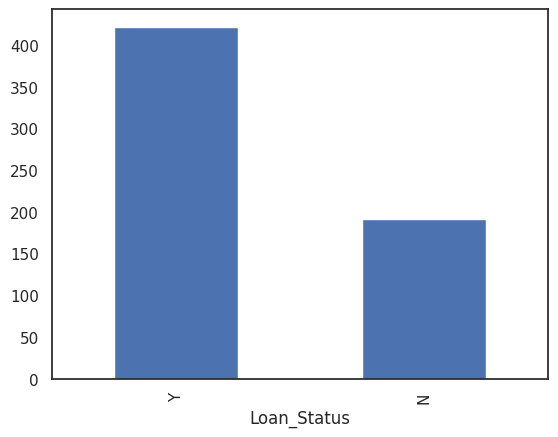

In [12]:
df['Loan_Status'].value_counts().plot.bar()

Bivariate Analysis for Variable and Target Variables.

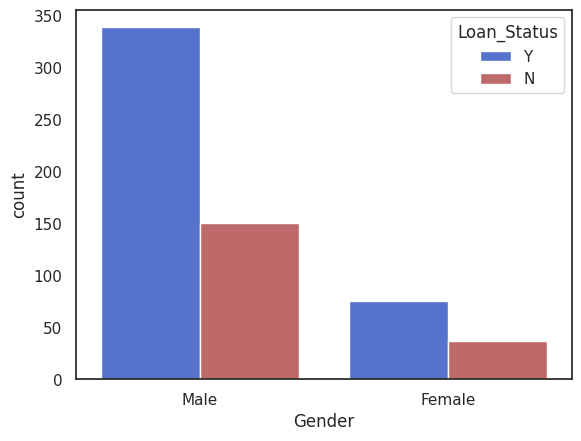

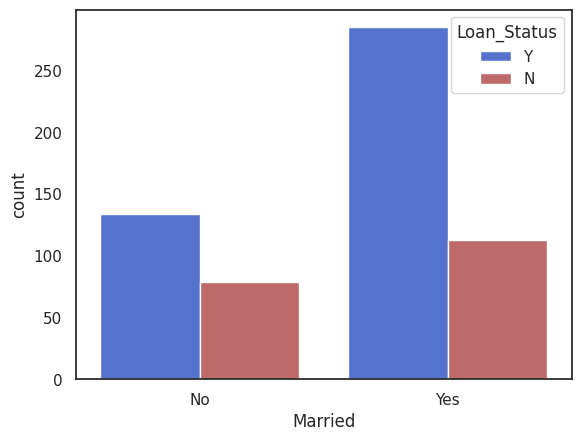

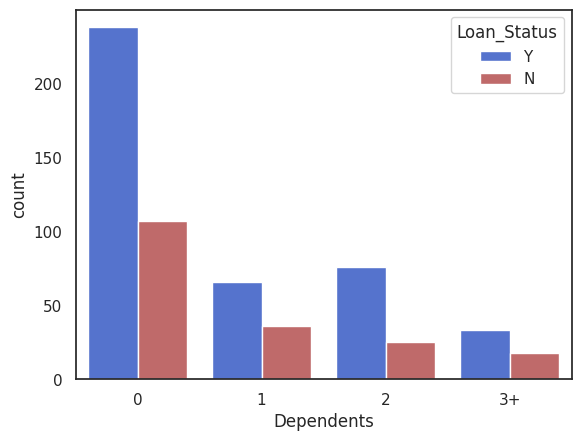

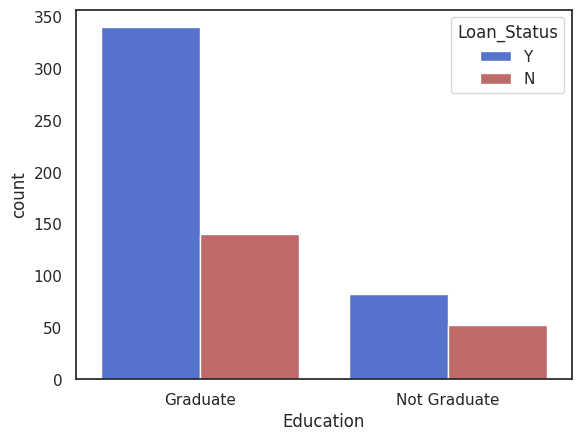

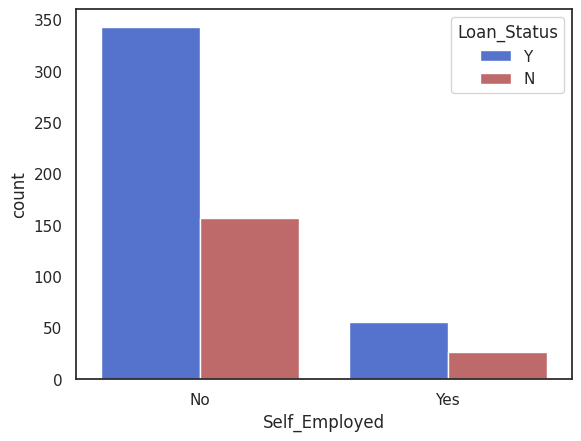

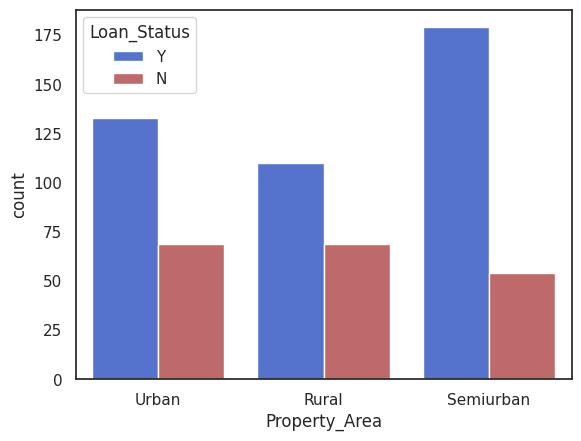

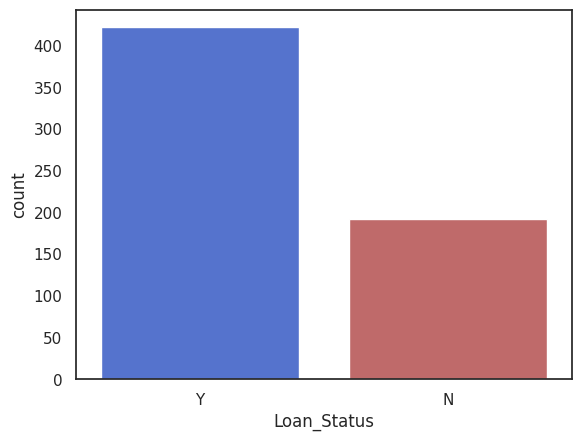

In [13]:

for var in cat_vars:
    sns.countplot(x=var, hue='Loan_Status', data=df, palette= ['#4169E1', '#CD5C5C'])
    plt.show()

<Figure size 800x400 with 0 Axes>

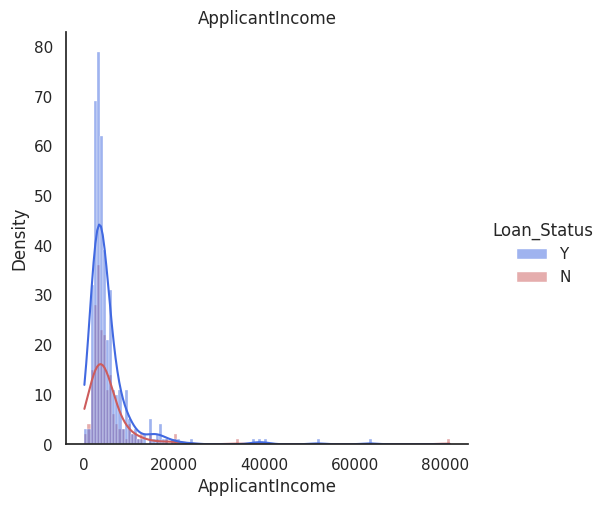

<Figure size 800x400 with 0 Axes>

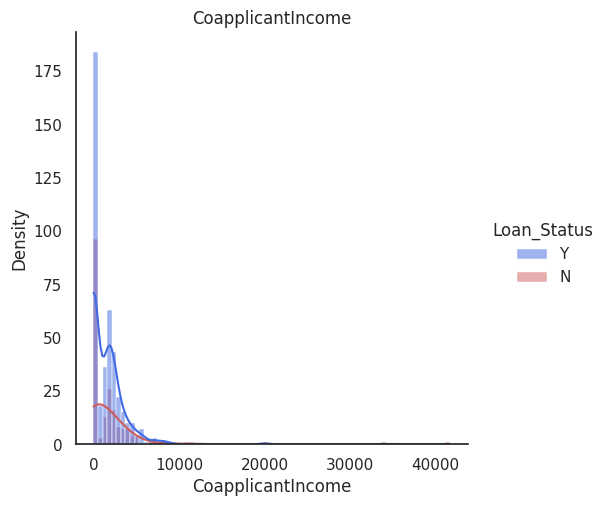

<Figure size 800x400 with 0 Axes>

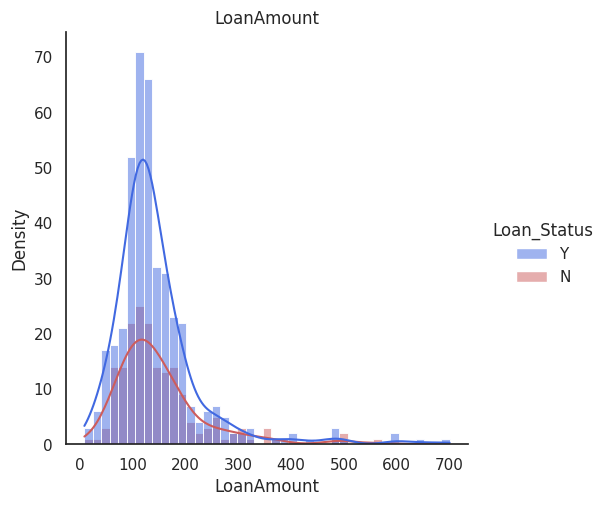

<Figure size 800x400 with 0 Axes>

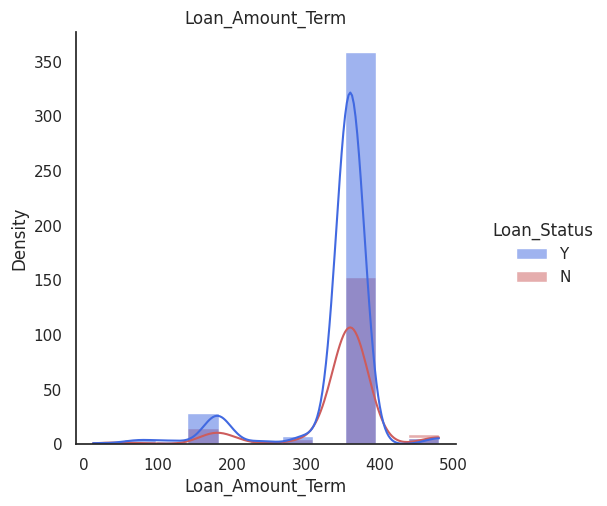

<Figure size 800x400 with 0 Axes>

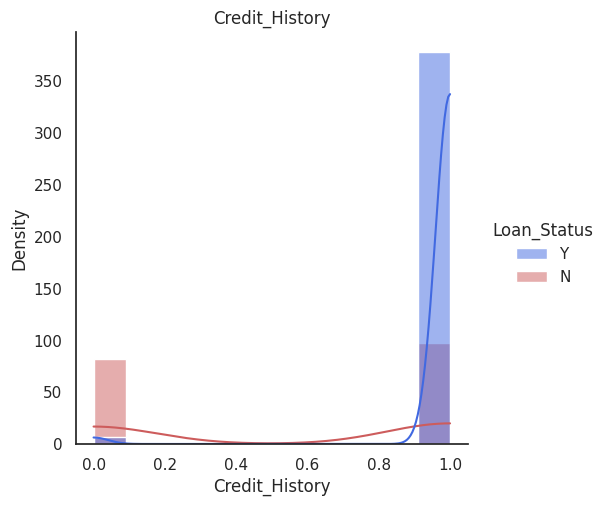

In [14]:
for var in num_vars:
    plt.figure(figsize=(8,4))
    sns.displot(data=df, x=var, hue='Loan_Status', kde=True, palette= ['#4169E1', '#CD5C5C'])

    plt.title(var)
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.show()

Heatmap

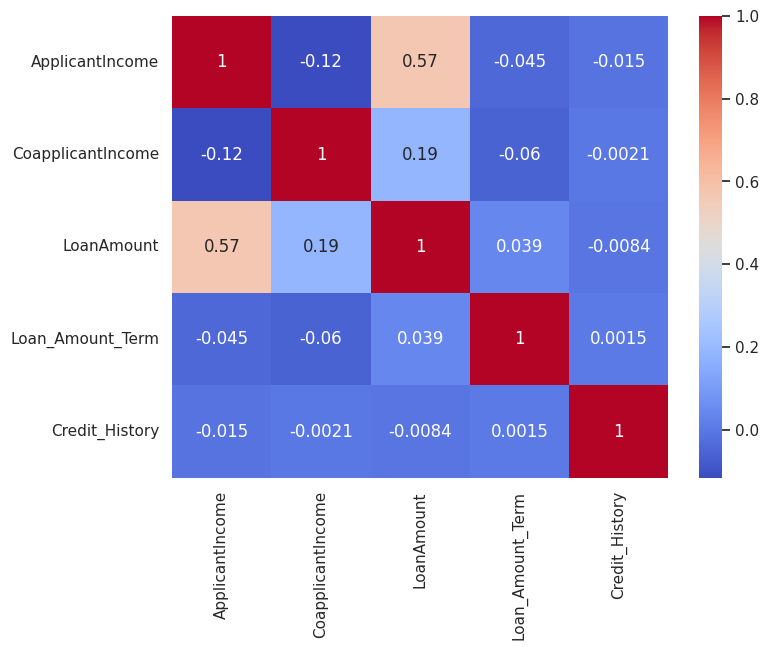

In [15]:
cor = df[num_vars].corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

Cleaning the data set

In [16]:
df .isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
from sklearn.linear_model import LinearRegression

df.isnull().sum()

#finding out the mode pof categorical values and filling the null values
catvars=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for var in catvars:
  mode =df[var].mode()[0]
  df[var].fillna(mode,inplace=True)
#finding the missing numerical values
numvars=['Loan_Amount_Term', 'Credit_History']
for var in numvars:
  mean =df[var].mean()
  df[var].fillna(mean, inplace=True)


In [18]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Predicting the Loan_Amount with the linear Regression

In [19]:
df_reg = df.dropna(subset=['LoanAmount'])
X = df_reg[['ApplicantIncome']]
y = df_reg['LoanAmount']
reg = LinearRegression().fit(X, y)
df.loc[df['LoanAmount'].isnull(), 'LoanAmount'] = reg.predict(df.loc[df['LoanAmount'].isnull()][['ApplicantIncome']])

In [20]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
#combinig the computed values
imputed_df = pd.concat([df[cat_vars],df[num_vars]],axis=1)

In [22]:
!pip install scikit-learn

In [23]:
#handeling categorical values  by encoding them as numerical variables
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
df['Education']=LabelEncoder().fit_transform(df['Education'])
df['Dependents']=LabelEncoder().fit_transform(df['Dependents'])
df['Self_Employed']=LabelEncoder().fit_transform(df['Self_Employed'])
df['Gender']=LabelEncoder().fit_transform(df['Gender'])
df['Married']=LabelEncoder().fit_transform(df['Married'])
df['Property_Area']=LabelEncoder().fit_transform(df['Property_Area'])
df['Loan_Status']=LabelEncoder().fit_transform(df['Loan_Status'])


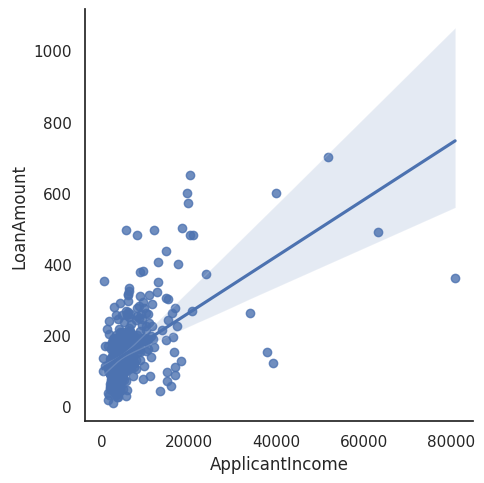

In [24]:
import seaborn as sns

sns.lmplot(x="ApplicantIncome", y="LoanAmount", data=df)

log transformation

In [25]:
df['LoanAmount_log']=np.log(df['LoanAmount'])


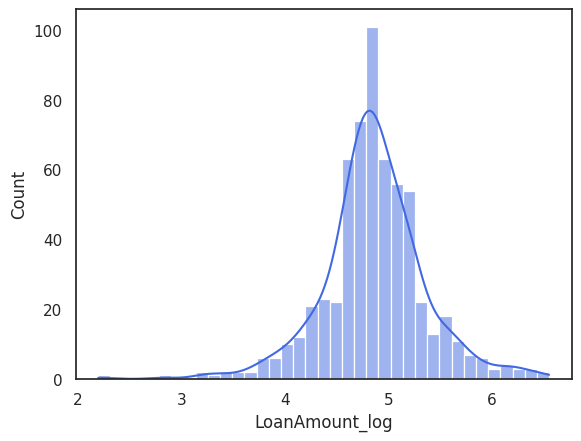

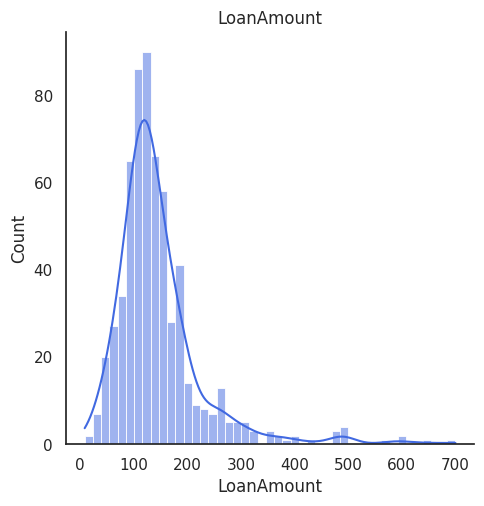

In [26]:
sns.histplot(df['LoanAmount_log'], color='royalblue', kde='True')
plt.show()

sns.displot(df['LoanAmount'], color='royalblue', kde='True')
plt.title('LoanAmount')
plt.show()

In [27]:
df.duplicated().sum()

0

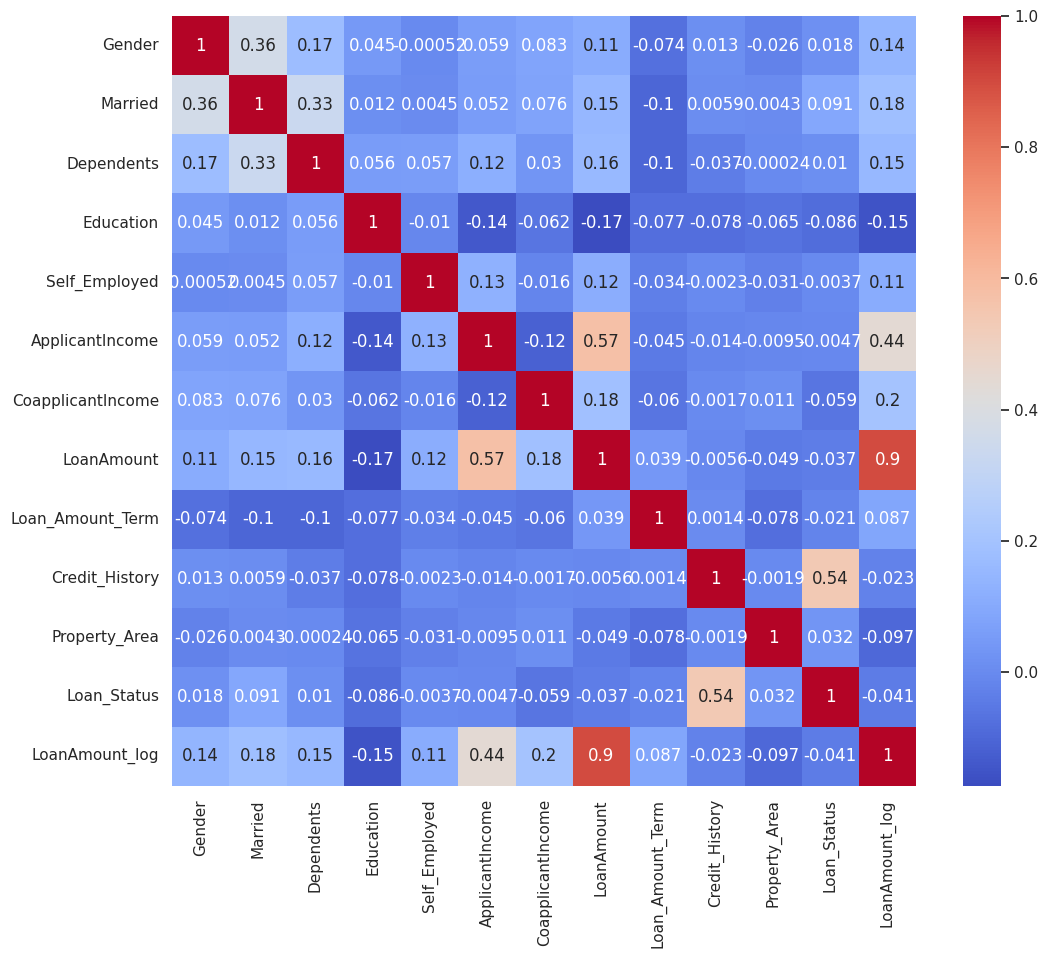

In [28]:
cor=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

Training and spliting the data


In [29]:
import numpy as np
np.random.seed(42)
from sklearn.model_selection import train_test_split
import xgboost as xgb # (Extreme Gradient Boosting) improve the performance of traditional algorithms
import warnings # control the warning behavior
warnings.filterwarnings('ignore')

In [30]:
X = df.drop(['Loan_Status', 'LoanAmount'], axis=1)
y = df['Loan_Status']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import VotingClassifier

In [33]:
logreg = LogisticRegression(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
gbm = xgb.XGBClassifier(random_state=42)
lightgbm = LGBMClassifier(random_state=42)
knn = KNeighborsClassifier()
nb = GaussianNB()

model = Sequential()
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

ensemble = VotingClassifier(estimators=[('lr', logreg), ('dt', dtc), ('rf', rfc), ('svc', svm)], voting='hard')

fitting and evaluation


In [34]:
# Fit the model on training data
# Train the models using the training set:
logreg.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
svm.fit(X_train, y_train)
gbm.fit(X_train, y_train)
lightgbm.fit(X_train, y_train)
knn.fit(X_train, y_train)
nb.fit(X_train, y_train)
model.fit(X_train, y_train, epochs=150, batch_size=10)
ensemble.fit(X_train, y_train)

# Evaluate the performance of the model on the testing set.
from sklearn.metrics import accuracy_score

# Evaluate the performance of the model

[LightGBM] [Info] Number of positive: 342, number of negative: 149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696538 -> initscore=0.830864
[LightGBM] [Info] Start training from score 0.830864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [35]:
y_pred_logreg = logreg.predict(X_test)
y_pred_dtc = dtc.predict(X_test)
y_pred_rfc = rfc.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_gbm = gbm.predict(X_test)
y_pred_lightgbm = lightgbm.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_nb = nb.predict(X_test)
accuracy = model.evaluate(X_test, y_test)
y_pred_ensemble = ensemble.predict(X_test)

print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_logreg))
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dtc))
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rfc))
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))
print('GBM Accuracy:', accuracy_score(y_test, y_pred_gbm))
print('LightGBM Accuracy:', accuracy_score(y_test, y_pred_lightgbm))
print('KNN Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Naive Bayes Accuracy:', accuracy_score(y_test, y_pred_nb))
print('Neural Network Accuracy:', accuracy)
print('Ensemble Accuracy:', accuracy_score(y_test, y_pred_ensemble))

4/4 [==============================] - 0s 4ms/step - loss: 1.5921 - accuracy: 0.6260
Logistic Regression Accuracy: 0.7886178861788617
Decision Tree Accuracy: 0.7317073170731707
Random Forest Accuracy: 0.7642276422764228
SVM Accuracy: 0.6504065040650406
GBM Accuracy: 0.7723577235772358
LightGBM Accuracy: 0.7560975609756098
KNN Accuracy: 0.5772357723577236
Naive Bayes Accuracy: 0.7804878048780488
Neural Network Accuracy: [1.592124104499817, 0.6260162591934204]
Ensemble Accuracy: 0.7560975609756098


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Load data
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Create logistic regression model
model = LogisticRegression(random_state=42)

# Evaluate model using k-fold cross-validation
k = 5
scores = cross_val_score(model, X, y, cv=k)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.7997 (+/- 0.06)


array([0.80487805, 0.76422764, 0.7804878 , 0.85365854, 0.79508197])

In [37]:
# k-fold cross-validation for RandomForest model

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Load data
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Create Random Forest model
model = RandomForestClassifier(random_state=42)

# Evaluate model using k-fold cross-validation
k = 5
scores = cross_val_score(model, X, y, cv=k)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.7883 (+/- 0.06)


array([0.79674797, 0.73170732, 0.78861789, 0.81300813, 0.81147541])

In [38]:
# k-fold cross-validation for lightgbm model

from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

# Load data
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Create LightGBM model
model = LGBMClassifier(random_state=42)

# Evaluate model using k-fold cross-validation
k = 5
scores = cross_val_score(model, X, y, cv=k)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

[LightGBM] [Info] Number of positive: 337, number of negative: 154
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.686354 -> initscore=0.783130
[LightGBM] [Info] Start training from score 0.783130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

array([0.75609756, 0.77235772, 0.78861789, 0.82113821, 0.76229508])

In [39]:
import numpy as np
np.random.seed(42)

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Load data
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Create Naive Bayes model
model = GaussianNB()

# Evaluate model using k-fold cross-validation
k = 5
scores = cross_val_score(model, X, y, cv=k)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.7883 (+/- 0.05)


array([0.79674797, 0.75609756, 0.76422764, 0.82926829, 0.79508197])

In [40]:
# k-fold cross-validation for ensemble model
import numpy as np
np.random.seed(42)

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

# Load data
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Create Ensemble model
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = KNeighborsClassifier()
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('knn', model3)], voting='hard')

# Evaluate model using k-fold cross-validation
k = 5
cores = cross_val_score(model, X, y, cv=k)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.7883 (+/- 0.05)


array([0.79674797, 0.75609756, 0.76422764, 0.82926829, 0.79508197])

In [41]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Load data
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Create XGBoost model
model = xgb.XGBClassifier(random_state=42)

# Evaluate model using k-fold cross-validation
k = 5
scores = cross_val_score(model, X, y, cv=k)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.7638 (+/- 0.05)


In [42]:
# The validation set approach for LogisticRegression model
import numpy as np
np.random.seed(42)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Define hyperparameters to tune
penalty = ['none', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100]

# Loop over hyperparameters
best_score = 0
for p in penalty:
    for c in C:
        # Train model with current hyperparameters
      clf = LogisticRegression(penalty=p, C=c)
      clf.fit(X_train, y_train)
       # Evaluate model on validation set
      score = clf.score(X_val, y_val)

        # Update best score and hyperparameters if necessary
      if score > best_score:
          best_score = score
          best_penalty = p
          best_C = c

print(f'Best score: {best_score:.4f}')
print(f'Best penalty: {best_penalty}')
print(f'Best C: {best_C}')


Best score: 0.7967
Best penalty: l2
Best C: 10


In [43]:
# The validation set approach for RandomForest model
import numpy as np
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Define hyperparameters to tune
n_estimators = [100, 200, 300]
max_depth = [5, 10, 15]

# Loop over hyperparameters
best_score = 0
for n in n_estimators:
    for d in max_depth:
        # Train model with current hyperparameters
        clf = RandomForestClassifier(n_estimators=n, max_depth=d)
        clf.fit(X_train, y_train)

        # Evaluate model on validation set
        score = clf.score(X_val, y_val)

        # Update best score and hyperparameters if necessary
        if score > best_score:
            best_score = score
            best_n_estimators = n
            best_max_depth = d

print(f'Best score: {best_score:.4f}')
print(f'Best n_estimators: {best_n_estimators}')
print(f'Best max_depth: {best_max_depth}')

Best score: 0.7886
Best n_estimators: 100
Best max_depth: 5


In [50]:
# The validation set approach for lightgbm model
import numpy as np
np.random.seed(42)
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Define hyperparameters to tune
n_estimators = [100, 200, 300]
max_depth = [5, 10, 15]

# Loop over hyperparameters
best_score = 0
for n in n_estimators:
    for d in max_depth:
        # Train model with current hyperparameters
        clf = LGBMClassifier(n_estimators=n, max_depth=d)
        clf.fit(X_train, y_train, eval_set=[(X_val, y_val)])

        # Evaluate model on validation set
        score = clf.score(X_val, y_val)

        # Update best score and hyperparameters if necessary
        if score > best_score:
            best_score = score
            best_n_estimators = n
            best_max_depth = d

print(f'Best score: {best_score:.4f}')
print(f'Best n_estimators: {best_n_estimators}')
print(f'Best max_depth: {best_max_depth}')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 342, number of negative: 149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 476
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 12
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696538 -> initscore=0.830864
[LightGBM] [Info] Start training from score 0.830864
[LightGBM] [Warning] No further splits with positive gain, be

In [51]:
#The validation set approach for GaussianNB model
import numpy as np
np.random.seed(42)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Define hyperparameters to tune
var_smoothing = [1e-9, 1e-8, 1e-7]

# Loop over hyperparameters
best_score = 0
for v in var_smoothing:
    # Train model with current hyperparameters
    clf = GaussianNB(var_smoothing=v)
    clf.fit(X_train, y_train)

    # Evaluate model on validation set
    score = clf.score(X_val, y_val)

    # Update best score and hyperparameters if necessary
    if score > best_score:
        best_score = score
        best_var_smoothing = v

print(f'Best score: {best_score:.4f}')
print(f'Best var_smoothing: {best_var_smoothing}')

Best score: 0.7886
Best var_smoothing: 1e-09


In [52]:
# The validation set approach for ensemble model
import numpy as np
np.random.seed(42)
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Define hyperparameters to tune
n_estimators = [50, 100, 200]
max_depth = [3, 5, 7]

clf1 = DecisionTreeClassifier(max_depth=3)
clf2 = LogisticRegression()
clf3 = SVC(kernel='rbf', probability=True)


# Train model with current hyperparameters
clf = VotingClassifier(estimators=[('dt', clf1), ('lr', clf2), ('svm', clf3)], voting='soft')
clf.fit(X_train, y_train)

# Evaluate model on validation set
score = clf.score(X_val, y_val)
score

0.7886178861788617

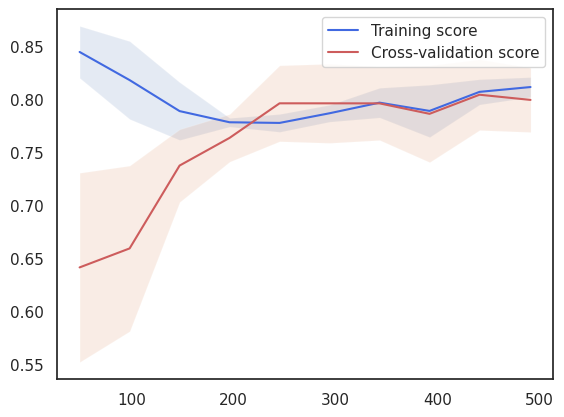

In [53]:
# Check for LogisticRegression overfitting
# If the training and validation curves converge at a high score, then the model is neither overfitting nor underfitting.

from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

train_sizes, train_scores, test_scores = learning_curve(
    estimator=LogisticRegression(),
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training score', color='royalblue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='indianred')

plt.fill_between(train_sizes,
                 train_mean - train_std,
                 train_mean + train_std,
                 alpha=0.15)

plt.fill_between(train_sizes,
                 test_mean - test_std,
                 test_mean + test_std,
                 alpha=0.15)

plt.legend()
plt.show()

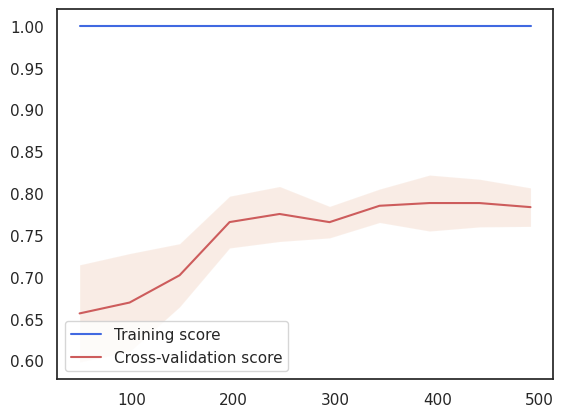

In [54]:
# Check for RandomForest overfitting or underfitting
# If the training curve has a high score and the validation curve has a low score, then the model is overfitting.
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    estimator=RandomForestClassifier(),
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score', color='royalblue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='indianred')

plt.fill_between(train_sizes,
                 train_mean - train_std,
                 train_mean + train_std,
                 alpha=0.15)

plt.fill_between(train_sizes,
                 test_mean - test_std,
                 test_mean + test_std,
                 alpha=0.15)

plt.legend()
plt.show()


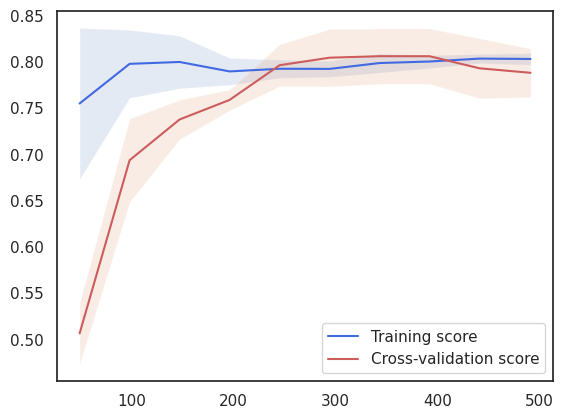

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    estimator=GaussianNB(),
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score', color='royalblue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='indianred')

plt.fill_between(train_sizes,
                 train_mean - train_std,
                 train_mean + train_std,
                 alpha=0.15)

plt.fill_between(train_sizes,
                 test_mean - test_std,
                 test_mean + test_std,
                 alpha=0.15)

plt.legend()
plt.show()


Precision: 0.7596
Recall: 0.9875
F1 score: 0.8587
ROC-AUC score: 0.7031


Text(0.5, 1.0, 'Output Confusion Matrix')

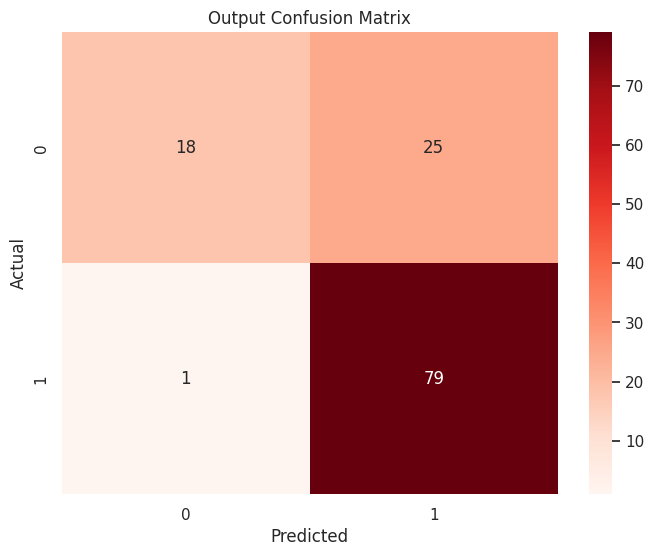

In [56]:
# Best Performing Model
# Classification Metrics and Confusion matrics for LogisticRegression model

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

X = df.drop(['Loan_Status', 'LoanAmount'], axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')
print(f'ROC-AUC score: {roc_auc:.4f}')

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")


Precision: 0.7573
Recall: 0.9750
F1 score: 0.8525
ROC-AUC score: 0.6968


Text(0.5, 1.0, 'Output Confusion Matrix')

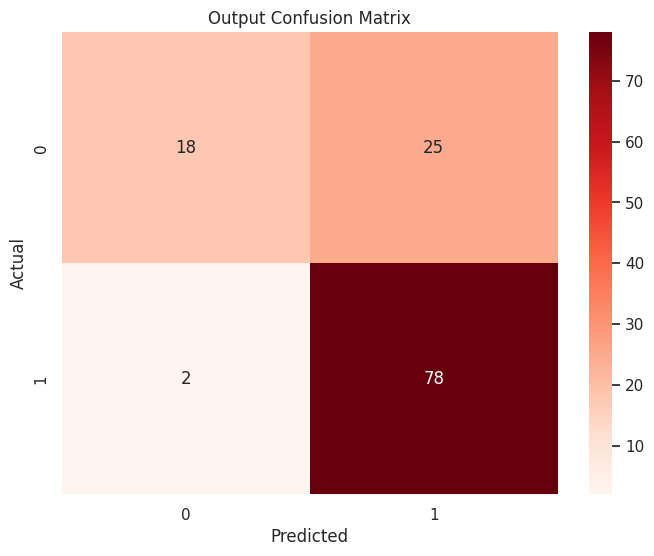

In [57]:
# Best Performing Model
# Classification Metrics and Confusion matrics for GaussianNB model

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB

X = df.drop(['Loan_Status', 'LoanAmount'], axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')
print(f'ROC-AUC score: {roc_auc:.4f}')

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")

What is the best machine learning algorithm for predicting loan approval? Logistic Regression/Gaussian Naive Bayes

How can we improve the accuracy of loan approval prediction models? Cross-Validation techniques and tune the parameters

How can we reduce bias in loan approval prediction models? Adding some extra data from a set of variable to handle the selection (Sample) Bias

In [58]:
for var in cat_vars:
    print(df.groupby(var)['Loan_Status'].value_counts(normalize=True))

Gender  Loan_Status
0       1              0.669643
        0              0.330357
1       1              0.691235
        0              0.308765
Name: proportion, dtype: float64
Married  Loan_Status
0        1              0.629108
         0              0.370892
1        1              0.718204
         0              0.281796
Name: proportion, dtype: float64
Dependents  Loan_Status
0           1              0.686111
            0              0.313889
1           1              0.647059
            0              0.352941
2           1              0.752475
            0              0.247525
3           1              0.647059
            0              0.352941
Name: proportion, dtype: float64
Education  Loan_Status
0          1              0.708333
           0              0.291667
1          1              0.611940
           0              0.388060
Name: proportion, dtype: float64
Self_Employed  Loan_Status
0              1              0.687970
               0          